In [115]:
import pandas as pd
import numpy as np
import seaborn as sns

In [116]:

df = pd.read_csv('intern_task.csv', sep=',')
df

,rank,query_id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,...,feature_134,feature_135,feature_136,feature_137,feature_138,feature_139,feature_140,feature_141,feature_142,feature_143
0,0,10,1.0,0.0,1.0,3.0,3.0,0.333333,0.0,0.333333,...,0.0,0.000000,0.454545,0.890238,8.655534,1.000000,0.077778,0.002222,1.0,0.333333
1,1,10,3.0,0.0,3.0,0.0,3.0,1.000000,0.0,1.000000,...,0.0,0.000000,0.000000,0.773976,23.130514,0.000000,0.027826,0.000430,44.0,14.666667
2,0,10,3.0,0.0,2.0,0.0,3.0,1.000000,0.0,0.666667,...,0.0,0.000000,0.000000,0.918308,13.351339,0.000000,0.014925,0.000104,22.0,7.333333
3,1,10,3.0,0.0,3.0,0.0,3.0,1.000000,0.0,1.000000,...,0.0,0.000000,0.000000,0.975355,18.240926,0.000000,0.053140,0.000255,8.0,2.666667
4,2,10,3.0,0.0,3.0,1.0,3.0,1.000000,0.0,1.000000,...,273.0,79.670665,0.200000,0.990119,31.786048,0.333333,0.046512,0.000307,24.0,8.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235253,2,29995,1.0,0.0,0.0,0.0,1.0,0.500000,0.0,0.000000,...,0.0,0.000000,0.000000,0.471409,0.000000,0.000000,0.001350,0.000002,3.0,1.500000
235254,2,29995,1.0,0.0,1.0,0.0,1.0,0.500000,0.0,0.500000,...,0.0,0.000000,0.000000,0.471409,39.908056,0.000000,0.004850,0.000014,9.0,4.500000
235255,1,29995,1.0,0.0,0.0,0.0,1.0,0.500000,0.0,0.000000,...,0.0,0.000000,0.000000,0.471409,0.000000,0.000000,0.001064,0.000001,1.0,0.500000
235256,2,29995,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000


In [117]:
df = df.dropna()
df.shape

(235258, 146)

<Axes: xlabel='rank', ylabel='Count'>

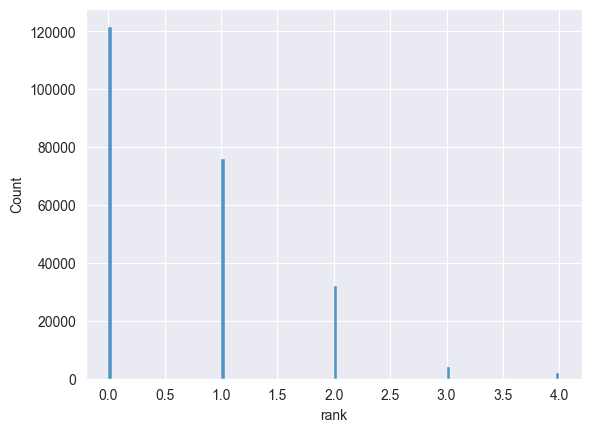

In [118]:
sns.histplot(df['rank'])

In [119]:
print('Среднее количество документво для запроса')
print(np.mean(df['query_id'].value_counts()))

Среднее количество документво для запроса
117.629


In [120]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import ndcg_score
from catboost import CatBoostRanker
from catboost import Pool

# Загрузка данных
df = pd.read_csv('intern_task.csv')

# Проверка датасета на наличие пропущенных значений
if df.isnull().sum().sum() > 0:
    print(
        "Датасет содержит пропущенные значения. Заполните или удалите их перед обучением модели.")
else:
    print("Датасет не содержит пропущенных значений.")
df = df[df.groupby('query_id').query_id.transform(len) > 1]
# Разделение данных на обучающую и тестовую выборки
train, test = train_test_split(df, test_size=0.3, random_state=42,
                               stratify=df['query_id'])
print(train.shape)
train = train.sort_values(['query_id'])
test = test.sort_values(['query_id'])
# Удаление групп с одним документом
#test = test[test.groupby('query_id')['query_id'].transform('count') > 1]
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train.drop(['rank', 'query_id'], axis=1))
print(train_scaled.shape)
test_scaled = scaler.transform(test.drop(['rank', 'query_id'], axis=1))
train_scaled = pd.concat([train['query_id'].reset_index(), pd.DataFrame(train_scaled)], axis=1).drop(columns=['index'])
test_scaled = pd.concat([test['query_id'].reset_index(), pd.DataFrame(test_scaled)], axis=1).drop(columns=['index'])
train_scaled

Датасет не содержит пропущенных значений.
(164678, 146)
(164678, 144)


,query_id,0,1,2,3,4,5,6,7,8,...,134,135,136,137,138,139,140,141,142,143
0,10,0.096774,0.0,0.125000,0.000000,0.096774,1.0,0.0,1.000000,0.000004,...,0.000000,0.000000e+00,0.000000,0.773976,0.017773,0.000000,0.045052,0.001720,0.002919,0.019530
1,10,0.096774,0.0,0.125000,0.000000,0.096774,1.0,0.0,1.000000,0.000170,...,0.000000,0.000000e+00,0.000000,0.999828,0.014016,0.000000,0.065416,0.000012,0.001924,0.012872
2,10,0.096774,0.0,0.083333,0.000000,0.096774,1.0,0.0,0.666667,0.000298,...,0.000000,0.000000e+00,0.000000,0.998916,0.010259,0.000000,0.029234,0.000016,0.000730,0.004882
3,10,0.096774,0.0,0.125000,0.000000,0.096774,1.0,0.0,1.000000,0.000217,...,0.000103,9.963206e-08,0.000000,0.875521,0.014016,0.000000,0.025298,0.000080,0.000398,0.002663
4,10,0.096774,0.0,0.125000,0.111111,0.096774,1.0,0.0,1.000000,0.000123,...,0.000000,0.000000e+00,0.152778,0.998223,0.017625,0.333333,0.004401,0.000000,0.001260,0.008433
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164673,29995,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.999804,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
164674,29995,0.032258,0.0,0.000000,0.000000,0.032258,0.5,0.0,0.000000,0.999970,...,0.000000,0.000000e+00,0.000000,0.471409,0.000000,0.000000,0.001687,0.000004,0.000066,0.000666
164675,29995,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.999783,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
164676,29995,0.032258,0.0,0.041667,0.111111,0.032258,0.5,0.0,0.500000,0.999834,...,0.000000,0.000000e+00,0.174603,0.471409,0.010222,0.500000,0.031916,0.001172,0.000597,0.005992


In [122]:
train_pool = Pool(train_scaled, label=train['rank'], group_id=train_scaled['query_id'])
test_pool = Pool(test_scaled, label=test['rank'], group_id=test_scaled['query_id'])

In [288]:
train_pool_gs = Pool(train_scaled, label=train['rank']/4, group_id=train_scaled['query_id'])
ranker_gs = CatBoostRanker(iterations=300, task_type='GPU', custom_metric=['NDCG:top=5;hints=skip_train~false', 'MAP:top=10', 'NDCG:top=10;hints=skip_train~false'], devices='0', loss_function='YetiRank', silent=True)
grid_params = {
    #'loss_function' : ['YetiRank', 'LambdaMart:metric=NDCG', 'StochasticRank', 'QueryCrossEntropy'],
    'depth': [4, 6, 10],
    'l2_leaf_reg': [0, 1, 3, 5],
    'learning_rate': [0.0001, 0.06, 0.6]
}

result = ranker_gs.grid_search(param_grid=grid_params, X=train_pool_gs, plot=True, cv=3)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Default metric period is 5 because PFound, MAP, NDCG is/are not implemented for GPU
Default metric period is 5 because PFound, MAP, NDCG is/are not implemented for GPU
Metric PFound is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
Metric PFound is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
Metric NDCG:top=5;type=Base is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
Metric MAP:top=10 is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
Metric NDCG:top=10;type=Base is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


bestTest = 0.6465067153
bestIteration = 90
Metric PFound is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
Metric PFound is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
0:	loss: 0.6465067	best: 0.6465067 (0)	total: 8.32s	remaining: 4m 51s


Default metric period is 5 because PFound, MAP, NDCG is/are not implemented for GPU
Metric PFound is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
Metric PFound is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
Metric NDCG:top=5;type=Base is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
Metric MAP:top=10 is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
Metric NDCG:top=10;type=Base is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


bestTest = 0.6777244828
bestIteration = 295
Metric PFound is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
Metric PFound is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
1:	loss: 0.6777245	best: 0.6777245 (1)	total: 16.1s	remaining: 4m 33s


Default metric period is 5 because PFound, MAP, NDCG is/are not implemented for GPU
Metric PFound is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
Metric PFound is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
Metric NDCG:top=5;type=Base is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
Metric MAP:top=10 is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
Metric NDCG:top=10;type=Base is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


bestTest = 0.6887946242
bestIteration = 280
Metric PFound is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
Metric PFound is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
2:	loss: 0.6887946	best: 0.6887946 (2)	total: 24.1s	remaining: 4m 25s


Default metric period is 5 because PFound, MAP, NDCG is/are not implemented for GPU
Metric PFound is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
Metric PFound is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
Metric NDCG:top=5;type=Base is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
Metric MAP:top=10 is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
Metric NDCG:top=10;type=Base is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


bestTest = 0.6349074886
bestIteration = 295
Metric PFound is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
Metric PFound is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
3:	loss: 0.6349075	best: 0.6887946 (2)	total: 32.2s	remaining: 4m 17s


Default metric period is 5 because PFound, MAP, NDCG is/are not implemented for GPU
Metric PFound is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
Metric PFound is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
Metric NDCG:top=5;type=Base is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
Metric MAP:top=10 is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
Metric NDCG:top=10;type=Base is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


bestTest = 0.6745720302
bestIteration = 285
Metric PFound is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
Metric PFound is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
4:	loss: 0.6745720	best: 0.6887946 (2)	total: 40s	remaining: 4m 7s


Default metric period is 5 because PFound, MAP, NDCG is/are not implemented for GPU
Metric PFound is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
Metric PFound is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
Metric NDCG:top=5;type=Base is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
Metric MAP:top=10 is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
Metric NDCG:top=10;type=Base is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


bestTest = 0.6896994976
bestIteration = 215
Metric PFound is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
Metric PFound is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
5:	loss: 0.6896995	best: 0.6896995 (5)	total: 48.3s	remaining: 4m 1s


Default metric period is 5 because PFound, MAP, NDCG is/are not implemented for GPU
Metric PFound is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
Metric PFound is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
Metric NDCG:top=5;type=Base is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
Metric MAP:top=10 is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
Metric NDCG:top=10;type=Base is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


bestTest = 0.6219820606
bestIteration = 295
Metric PFound is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
Metric PFound is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
6:	loss: 0.6219821	best: 0.6896995 (5)	total: 56.3s	remaining: 3m 53s


Default metric period is 5 because PFound, MAP, NDCG is/are not implemented for GPU
Metric PFound is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
Metric PFound is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
Metric NDCG:top=5;type=Base is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
Metric MAP:top=10 is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
Metric NDCG:top=10;type=Base is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


bestTest = 0.6697036023
bestIteration = 299
Metric PFound is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
Metric PFound is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
7:	loss: 0.6697036	best: 0.6896995 (5)	total: 1m 4s	remaining: 3m 45s


Default metric period is 5 because PFound, MAP, NDCG is/are not implemented for GPU
Metric PFound is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
Metric PFound is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
Metric NDCG:top=5;type=Base is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
Metric MAP:top=10 is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
Metric NDCG:top=10;type=Base is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


bestTest = 0.6926779313
bestIteration = 299
Metric PFound is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
Metric PFound is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
8:	loss: 0.6926779	best: 0.6926779 (8)	total: 1m 12s	remaining: 3m 37s


Default metric period is 5 because PFound, MAP, NDCG is/are not implemented for GPU
Metric PFound is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
Metric PFound is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
Metric NDCG:top=5;type=Base is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
Metric MAP:top=10 is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
Metric NDCG:top=10;type=Base is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


bestTest = 0.6040950335
bestIteration = 275
Metric PFound is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
Metric PFound is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
9:	loss: 0.6040950	best: 0.6926779 (8)	total: 1m 20s	remaining: 3m 30s


Default metric period is 5 because PFound, MAP, NDCG is/are not implemented for GPU
Metric PFound is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
Metric PFound is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
Metric NDCG:top=5;type=Base is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
Metric MAP:top=10 is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
Metric NDCG:top=10;type=Base is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


bestTest = 0.6636390463
bestIteration = 299
Metric PFound is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
Metric PFound is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
10:	loss: 0.6636390	best: 0.6926779 (8)	total: 1m 28s	remaining: 3m 22s


Default metric period is 5 because PFound, MAP, NDCG is/are not implemented for GPU
Metric PFound is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
Metric PFound is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
Metric NDCG:top=5;type=Base is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
Metric MAP:top=10 is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
Metric NDCG:top=10;type=Base is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


bestTest = 0.6870310363
bestIteration = 299
Metric PFound is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
Metric PFound is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
11:	loss: 0.6870310	best: 0.6926779 (8)	total: 1m 36s	remaining: 3m 13s


Default metric period is 5 because PFound, MAP, NDCG is/are not implemented for GPU
Metric PFound is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
Metric PFound is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
Metric NDCG:top=5;type=Base is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
Metric MAP:top=10 is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
Metric NDCG:top=10;type=Base is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


bestTest = 0.6527294369
bestIteration = 299
Metric PFound is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
Metric PFound is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
12:	loss: 0.6527294	best: 0.6926779 (8)	total: 1m 47s	remaining: 3m 10s


Default metric period is 5 because PFound, MAP, NDCG is/are not implemented for GPU
Metric PFound is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
Metric PFound is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
Metric NDCG:top=5;type=Base is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
Metric MAP:top=10 is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
Metric NDCG:top=10;type=Base is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


bestTest = 0.6808105434
bestIteration = 285
Metric PFound is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
Metric PFound is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
13:	loss: 0.6808105	best: 0.6926779 (8)	total: 1m 58s	remaining: 3m 5s


Default metric period is 5 because PFound, MAP, NDCG is/are not implemented for GPU
Metric PFound is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
Metric PFound is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
Metric NDCG:top=5;type=Base is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
Metric MAP:top=10 is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
Metric NDCG:top=10;type=Base is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


bestTest = 0.6907601721
bestIteration = 145
Metric PFound is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
Metric PFound is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
14:	loss: 0.6907602	best: 0.6926779 (8)	total: 2m 8s	remaining: 2m 59s


Default metric period is 5 because PFound, MAP, NDCG is/are not implemented for GPU
Metric PFound is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
Metric PFound is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
Metric NDCG:top=5;type=Base is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
Metric MAP:top=10 is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
Metric NDCG:top=10;type=Base is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


bestTest = 0.641340489
bestIteration = 299
Metric PFound is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
Metric PFound is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
15:	loss: 0.6413405	best: 0.6926779 (8)	total: 2m 18s	remaining: 2m 53s


Default metric period is 5 because PFound, MAP, NDCG is/are not implemented for GPU
Metric PFound is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
Metric PFound is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
Metric NDCG:top=5;type=Base is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
Metric MAP:top=10 is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
Metric NDCG:top=10;type=Base is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


bestTest = 0.6769365193
bestIteration = 299
Metric PFound is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
Metric PFound is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
16:	loss: 0.6769365	best: 0.6926779 (8)	total: 2m 29s	remaining: 2m 46s


Default metric period is 5 because PFound, MAP, NDCG is/are not implemented for GPU
Metric PFound is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
Metric PFound is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
Metric NDCG:top=5;type=Base is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
Metric MAP:top=10 is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
Metric NDCG:top=10;type=Base is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


bestTest = 0.6943350298
bestIteration = 285
Metric PFound is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
Metric PFound is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
17:	loss: 0.6943350	best: 0.6943350 (17)	total: 2m 39s	remaining: 2m 39s


Default metric period is 5 because PFound, MAP, NDCG is/are not implemented for GPU
Metric PFound is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
Metric PFound is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
Metric NDCG:top=5;type=Base is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
Metric MAP:top=10 is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
Metric NDCG:top=10;type=Base is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


bestTest = 0.63752869
bestIteration = 265
Metric PFound is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
Metric PFound is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
18:	loss: 0.6375287	best: 0.6943350 (17)	total: 2m 49s	remaining: 2m 31s


Default metric period is 5 because PFound, MAP, NDCG is/are not implemented for GPU
Metric PFound is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
Metric PFound is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
Metric NDCG:top=5;type=Base is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
Metric MAP:top=10 is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
Metric NDCG:top=10;type=Base is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


bestTest = 0.6687603594
bestIteration = 299
Metric PFound is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
Metric PFound is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
19:	loss: 0.6687604	best: 0.6943350 (17)	total: 3m	remaining: 2m 24s


Default metric period is 5 because PFound, MAP, NDCG is/are not implemented for GPU
Metric PFound is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
Metric PFound is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
Metric NDCG:top=5;type=Base is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
Metric MAP:top=10 is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
Metric NDCG:top=10;type=Base is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


bestTest = 0.6922584405
bestIteration = 299
Metric PFound is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
Metric PFound is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
20:	loss: 0.6922584	best: 0.6943350 (17)	total: 3m 10s	remaining: 2m 16s


Default metric period is 5 because PFound, MAP, NDCG is/are not implemented for GPU
Metric PFound is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
Metric PFound is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
Metric NDCG:top=5;type=Base is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
Metric MAP:top=10 is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
Metric NDCG:top=10;type=Base is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


bestTest = 0.6383471746
bestIteration = 299
Metric PFound is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
Metric PFound is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
21:	loss: 0.6383472	best: 0.6943350 (17)	total: 3m 21s	remaining: 2m 7s


Default metric period is 5 because PFound, MAP, NDCG is/are not implemented for GPU
Metric PFound is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
Metric PFound is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
Metric NDCG:top=5;type=Base is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
Metric MAP:top=10 is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
Metric NDCG:top=10;type=Base is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


bestTest = 0.6626499744
bestIteration = 299
Metric PFound is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
Metric PFound is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
22:	loss: 0.6626500	best: 0.6943350 (17)	total: 3m 31s	remaining: 1m 59s


Default metric period is 5 because PFound, MAP, NDCG is/are not implemented for GPU
Metric PFound is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
Metric PFound is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
Metric NDCG:top=5;type=Base is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
Metric MAP:top=10 is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
Metric NDCG:top=10;type=Base is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


bestTest = 0.6902822898
bestIteration = 270
Metric PFound is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
Metric PFound is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
23:	loss: 0.6902823	best: 0.6943350 (17)	total: 3m 41s	remaining: 1m 50s


Default metric period is 5 because PFound, MAP, NDCG is/are not implemented for GPU
Metric PFound is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
Metric PFound is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
Metric NDCG:top=5;type=Base is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
Metric MAP:top=10 is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
Metric NDCG:top=10;type=Base is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


bestTest = 0.6603436396
bestIteration = 195
Metric PFound is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
Metric PFound is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
24:	loss: 0.6603436	best: 0.6943350 (17)	total: 4m 25s	remaining: 1m 56s


Default metric period is 5 because PFound, MAP, NDCG is/are not implemented for GPU
Metric PFound is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
Metric PFound is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
Metric NDCG:top=5;type=Base is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
Metric MAP:top=10 is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
Metric NDCG:top=10;type=Base is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


bestTest = 0.6866091373
bestIteration = 255
Metric PFound is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
Metric PFound is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
25:	loss: 0.6866091	best: 0.6943350 (17)	total: 5m 10s	remaining: 1m 59s


Default metric period is 5 because PFound, MAP, NDCG is/are not implemented for GPU
Metric PFound is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
Metric PFound is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
Metric NDCG:top=5;type=Base is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
Metric MAP:top=10 is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
Metric NDCG:top=10;type=Base is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


bestTest = 0.6920650262
bestIteration = 299
Metric PFound is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
Metric PFound is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
26:	loss: 0.6920650	best: 0.6943350 (17)	total: 5m 54s	remaining: 1m 58s


Default metric period is 5 because PFound, MAP, NDCG is/are not implemented for GPU
Metric PFound is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
Metric PFound is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
Metric NDCG:top=5;type=Base is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
Metric MAP:top=10 is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
Metric NDCG:top=10;type=Base is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


bestTest = 0.6435370656
bestIteration = 55
Metric PFound is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
Metric PFound is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
27:	loss: 0.6435371	best: 0.6943350 (17)	total: 6m 41s	remaining: 1m 54s


Default metric period is 5 because PFound, MAP, NDCG is/are not implemented for GPU
Metric PFound is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
Metric PFound is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
Metric NDCG:top=5;type=Base is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
Metric MAP:top=10 is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
Metric NDCG:top=10;type=Base is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


bestTest = 0.676612518
bestIteration = 299
Metric PFound is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
Metric PFound is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
28:	loss: 0.6766125	best: 0.6943350 (17)	total: 7m 28s	remaining: 1m 48s


Default metric period is 5 because PFound, MAP, NDCG is/are not implemented for GPU
Metric PFound is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
Metric PFound is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
Metric NDCG:top=5;type=Base is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
Metric MAP:top=10 is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
Metric NDCG:top=10;type=Base is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


bestTest = 0.6930100082
bestIteration = 290
Metric PFound is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
Metric PFound is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
29:	loss: 0.6930100	best: 0.6943350 (17)	total: 8m 15s	remaining: 1m 39s


Default metric period is 5 because PFound, MAP, NDCG is/are not implemented for GPU
Metric PFound is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
Metric PFound is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
Metric NDCG:top=5;type=Base is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
Metric MAP:top=10 is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
Metric NDCG:top=10;type=Base is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


bestTest = 0.6374290709
bestIteration = 299
Metric PFound is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
Metric PFound is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
30:	loss: 0.6374291	best: 0.6943350 (17)	total: 9m 1s	remaining: 1m 27s


Default metric period is 5 because PFound, MAP, NDCG is/are not implemented for GPU
Metric PFound is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
Metric PFound is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
Metric NDCG:top=5;type=Base is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
Metric MAP:top=10 is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
Metric NDCG:top=10;type=Base is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


bestTest = 0.671599574
bestIteration = 295
Metric PFound is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
Metric PFound is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
31:	loss: 0.6715996	best: 0.6943350 (17)	total: 9m 48s	remaining: 1m 13s


Default metric period is 5 because PFound, MAP, NDCG is/are not implemented for GPU
Metric PFound is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
Metric PFound is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
Metric NDCG:top=5;type=Base is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
Metric MAP:top=10 is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
Metric NDCG:top=10;type=Base is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


bestTest = 0.6895606858
bestIteration = 299
Metric PFound is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
Metric PFound is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
32:	loss: 0.6895607	best: 0.6943350 (17)	total: 10m 34s	remaining: 57.7s


Default metric period is 5 because PFound, MAP, NDCG is/are not implemented for GPU
Metric PFound is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
Metric PFound is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
Metric NDCG:top=5;type=Base is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
Metric MAP:top=10 is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
Metric NDCG:top=10;type=Base is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


bestTest = 0.6345578468
bestIteration = 299
Metric PFound is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
Metric PFound is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
33:	loss: 0.6345578	best: 0.6943350 (17)	total: 11m 20s	remaining: 40s


Default metric period is 5 because PFound, MAP, NDCG is/are not implemented for GPU
Metric PFound is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
Metric PFound is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
Metric NDCG:top=5;type=Base is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
Metric MAP:top=10 is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
Metric NDCG:top=10;type=Base is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


bestTest = 0.6649104504
bestIteration = 299
Metric PFound is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
Metric PFound is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
34:	loss: 0.6649105	best: 0.6943350 (17)	total: 12m 6s	remaining: 20.8s


Default metric period is 5 because PFound, MAP, NDCG is/are not implemented for GPU
Metric PFound is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
Metric PFound is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
Metric NDCG:top=5;type=Base is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
Metric MAP:top=10 is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
Metric NDCG:top=10;type=Base is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


bestTest = 0.6889948073
bestIteration = 295
Metric PFound is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
Metric PFound is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
35:	loss: 0.6889948	best: 0.6943350 (17)	total: 12m 53s	remaining: 0us
Estimating final quality...


Default metric period is 5 because PFound, MAP, NDCG is/are not implemented for GPU
Metric PFound is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
Metric PFound is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
Metric NDCG:top=5;type=Base is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
Metric MAP:top=10 is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
Metric NDCG:top=10;type=Base is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


Training on fold [0/3]
bestTest = 0.7167206569
bestIteration = 250
Training on fold [1/3]


Metric PFound is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
Metric PFound is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
Metric NDCG:top=5;type=Base is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
Metric MAP:top=10 is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
Metric NDCG:top=10;type=Base is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


bestTest = 0.7027187169
bestIteration = 250
Training on fold [2/3]


Metric PFound is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
Metric PFound is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
Metric NDCG:top=5;type=Base is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
Metric MAP:top=10 is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
Metric NDCG:top=10;type=Base is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


bestTest = 0.6955538672
bestIteration = 290


Default metric period is 5 because PFound, MAP, NDCG is/are not implemented for GPU
Metric PFound is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
Metric PFound is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
Metric NDCG:top=5;type=Base is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
Metric MAP:top=10 is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
Metric NDCG:top=10;type=Base is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


In [308]:
ranker = CatBoostRanker(iterations=10000, 
                        task_type="GPU",
                        devices='0', 
                        depth=10, 
                        loss_function='YetiRank', 
                        metric_period=50,
                        l2_leaf_reg= None,
                        custom_metric=['NDCG:top=5;hints=skip_train~false', 'MAP:top=10', 'NDCG:top=10;hints=skip_train~false'])



# Обучение модели
ranker.fit(train_pool, eval_set=test_pool, plot=True, verbose=False)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Metric NDCG:type=Base is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
Metric NDCG:type=Base is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
Metric NDCG:top=5;type=Base is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
Metric MAP:top=10 is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
Metric NDCG:top=10;type=Base is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


## Выгрузка модели в pkl для дальнейшего использования

In [114]:
import pickle

pickle.dump(ranker, open('catRanker.pkl', 'wb'))

In [298]:
import pickle
ranker = pickle.load(open('catRanker.pkl', 'rb'))

In [309]:
# Предсказание рангов для тестовой выборки
preds = ranker.predict(test_scaled)

In [310]:

from sklearn.metrics import ndcg_score, label_ranking_average_precision_score

# Добавление прогнозов в тестовый набор данных
test['preds'] = preds

# Группировка по query_id и вычисление NDCG для каждой группы
ndcg5_scores = []
ndcg50_scores = []
for query_id, group in test.groupby('query_id'):
    true_relevance = group['rank'].values.reshape(1, -1)
    predicted_scores = group['preds'].values.reshape(1, -1)
    try:
        ndcg = ndcg_score(true_relevance, predicted_scores, k=5)
        ndcg5_scores.append(ndcg)
        ndcg50_scores.append(ndcg_score(true_relevance, predicted_scores, k=50))
    except ValueError:
        #print(true_relevance)
        #print(predicted_scores)
        continue
        


# Усреднение NDCG по всем группам
average_ndcg = np.mean(ndcg5_scores)
print(f"Average NDCG@5: {average_ndcg}")
print(f"Average NDCG@50: {np.mean(ndcg50_scores)}")

Average NDCG@5: 0.5899745066488535
Average NDCG@50: 0.7482547724312422


In [301]:
ranker.get_all_params()

{'nan_mode': 'Min',
 'gpu_ram_part': 0.95,
 'eval_metric': 'NDCG',
 'iterations': 10000,
 'leaf_estimation_method': 'Newton',
 'observations_to_bootstrap': 'TestOnly',
 'random_score_type': 'NormalWithModelSizeDecrease',
 'grow_policy': 'SymmetricTree',
 'penalties_coefficient': 1,
 'boosting_type': 'Plain',
 'feature_border_type': 'GreedyLogSum',
 'bayesian_matrix_reg': 0.10000000149011612,
 'devices': '0',
 'eval_fraction': 0,
 'pinned_memory_bytes': '104857600',
 'force_unit_auto_pair_weights': False,
 'l2_leaf_reg': 9.999999682655224e-21,
 'random_strength': 1,
 'rsm': 1,
 'boost_from_average': False,
 'gpu_cat_features_storage': 'GpuRam',
 'fold_size_loss_normalization': False,
 'model_size_reg': 0.5,
 'pool_metainfo_options': {'tags': {}},
 'use_best_model': True,
 'meta_l2_frequency': 0,
 'random_seed': 0,
 'depth': 10,
 'border_count': 128,
 'min_fold_size': 100,
 'data_partition': 'DocParallel',
 'bagging_temperature': 1,
 'classes_count': 0,
 'auto_class_weights': 'None',
 'c

In [272]:
def apk(actual, predicted, k=10):
    """
    Computes the average precision at k.
    This function computes the average prescision at k between two lists of
    items.
    Parameters
    ----------
    actual : list
             A list of elements that are to be predicted (order doesn't matter)
    predicted : list
                A list of predicted elements (order does matter)
    k : int, optional
        The maximum number of predicted elements
    Returns
    -------
    score : double
            The average precision at k over the input lists
    """
    if not actual:
        return 0.0

    if len(predicted)>k:
        predicted = predicted[:k]

    score = 0.0
    num_hits = 0.0

    for i,p in enumerate(predicted):
        
        if p == actual[i]:
            num_hits += 1.0
            score += num_hits / (i+1.0)
    
    if num_hits == 0:
        return 0
    return score / num_hits

def mapk(k=10):
    """
    Computes the mean average precision at k.
    This function computes the mean average prescision at k between two lists
    of lists of items.
    Parameters
    ----------
    actual : list
             A list of lists of elements that are to be predicted 
             (order doesn't matter in the lists)
    predicted : list
                A list of lists of predicted elements
                (order matters in the lists)
    k : int, optional
        The maximum number of predicted elements
    Returns
    -------
    score : double
            The mean average precision at k over the input lists
    """
    apks = []
    for query_id, group in test.groupby('query_id'):
        '''print(group['rank'].values)
        print(group['preds'].values)
        break'''
        true_relevance = list(group['rank'].sort_values(ascending=False).index)
        predicted_scores = list(group['preds'].sort_values(ascending=False).index)
        
        try:
            apk_curr = apk(true_relevance, predicted_scores, k)
            apks.append(apk_curr)
        except ValueError as e:
            #print(true_relevance)
            #print(predicted_scores)
            print(e)
            continue
    return np.mean(apks)

In [311]:
mapk(50)


0.22257957295370814

In [270]:
apk([1, 2, 3, 4, 5, 6], [1, 0, 0, 4, 5, 8], 6)

0.7000000000000001